<a href="https://colab.research.google.com/github/yashikesarwani/ML-Algorithm-Implementation/blob/master/ReviewClassification_MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("/content/drive/My Drive/Smartknower/StreamlitDeployment/Twittter_Sentiment_Analysis.csv",encoding='latin-1', names = ["Score", "id", "date", "flag", "userid", "Sentiment"], header = None ) 
df.head(5)

,Score,id,date,flag,userid,Sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df =df.drop(['id','date','flag','userid'], axis = 1)

In [4]:
df.head(5)

,Score,Sentiment
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.shape

(1600000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Score      1600000 non-null  int64 
 1   Sentiment  1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [7]:
df['Score'] = df['Score'].replace([4],"Positive")
df['Score'] = df['Score'].replace([0],"Negative")

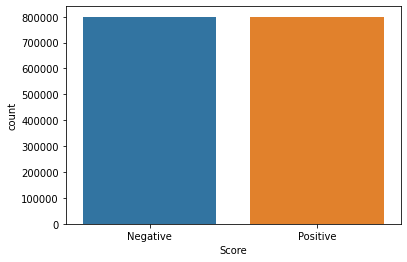

In [8]:
sns.countplot(x = 'Score', data = df)

In [9]:
df.head()

,Score,Sentiment
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.describe()

,Score,Sentiment
count,1600000,1600000
unique,2,1581466
top,Positive,isPlayer Has Died! Sorry
freq,800000,210


In [11]:
print(df.isnull().sum())

Score        0
Sentiment    0
dtype: int64


In [12]:
df["Score"].unique()

array(['Negative', 'Positive'], dtype=object)

In [13]:
positive_sentiments = ' '.join(df[df['Score'] == "Positive"]['Sentiment'].str.lower())
negative_sentiments = ' '.join(df[df['Score'] == "Negative"]['Sentiment'].str.lower())

Text(0.5, 1.0, 'Positive tweets Wordcloud')

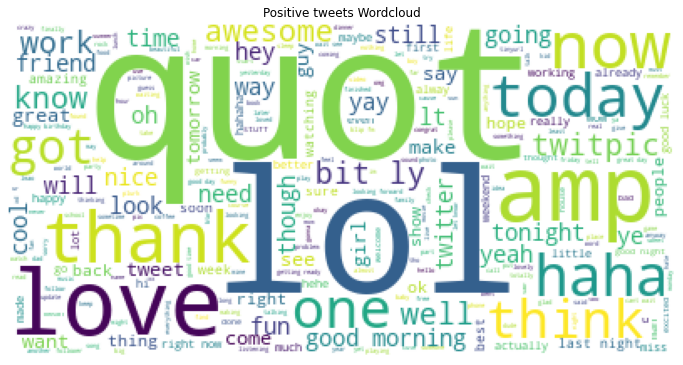

In [14]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_sentiments)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

Text(0.5, 1.0, 'Negative tweets Wordcloud')

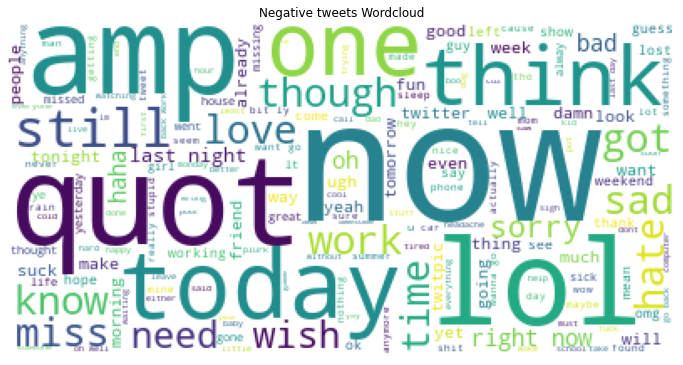

In [15]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_sentiments)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

In [16]:
x=df.iloc[:,-1].values
y=df.iloc[:,0].values

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import  MultinomialNB

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [19]:
test_model=Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])

In [20]:
test_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [21]:
y_pred = test_model.predict(X_test)
y_pred

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
       'Positive'], dtype='<U8')

In [22]:
y_test

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
accuracy_score(y_pred,y_test)*100

77.34166666666667

In [25]:
confusion_matrix(y_pred,y_test)

array([[196997,  65880],
       [ 42880, 174243]])

In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.82      0.75      0.78    262877
    Positive       0.73      0.80      0.76    217123

    accuracy                           0.77    480000
   macro avg       0.77      0.78      0.77    480000
weighted avg       0.78      0.77      0.77    480000



In [27]:
!pip install streamlit
!pip install pyngrok

In [53]:
%%writefile major_project.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import  MultinomialNB

def user_input():
  Review = st.text_input("enter your review")
  data={"Sentiment": Review}
  features= pd.DataFrame(data,index=[0])
  return features

st.title("ML Major Project Deployment")
st.subheader("SENTIMENT ANALYSIS OF REVIEWS")
dframe = user_input()
#st.write(dframe)

df=pd.read_csv("/content/drive/My Drive/Smartknower/StreamlitDeployment/Twittter_Sentiment_Analysis.csv",encoding='latin-1', names = ["Score", "id", "date", "flag", "userid", "Sentiment"], header = None ) 
df =df.drop(['id','date','flag','userid'], axis = 1)
df['Score'] = df['Score'].replace([4],"Positive")
df['Score'] = df['Score'].replace([0],"Negative")




x =df.iloc[:,-1].values
y =df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)


test_model=Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])
test_model.fit(X_train, y_train)

y_pred = test_model.predict(dframe)

st.write(y_pred)

Overwriting major_project.py


In [54]:
from pyngrok import ngrok
ngrok.connect(port='8501')

'http://ff029aa45d27.ngrok.io'

In [ ]:
!streamlit run major_project.py

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.236.151.48:8501

